In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import viz

from matplotlib import pyplot as plt

colors = viz.plotting_style()
lin_colors = colors.values()
plt.style.use('style.mpl')

color_order = ['green', 'blue', 'red', 'purple', 'yellow', 'dark_green', 'dark_blue', 'dark_brown']
lin_colors = [colors[c] for c in color_order]

In [2]:
var_S4_df = pd.read_csv('../output/Fig3A_variable_ZCorg_var_S4.csv')
var_S3_df = pd.read_csv('../output/Fig3B_variable_ZCorg_var_S3.csv')
var_ZCB_df = pd.read_csv('../output/Fig3C_variable_ZCorg_var_ZCB.csv')


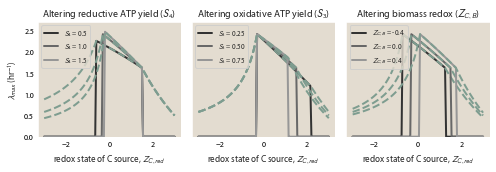

In [3]:
# Notice that phi_O increases as lambda decreases
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(7, 2.5), sharey=True)
pal = sns.color_palette('Greys_r', n_colors=5)

# Variable S4 = respiratory ATP yield
plt.sca(axs[0])
plt.title('Altering reductive ATP yield ($S_4$)')

my_S4s = [0.5, 1, 1.5]
for i, S4 in enumerate(my_S4s):
    masked = var_S4_df[var_S4_df['S4'] == S4]

    phi_H_included = masked[
        masked['opt.max_phi_H_set'] == False]
    no_phi_H = masked[
        masked['opt.max_phi_H_set'] == True]
    plt.plot(no_phi_H.ZCorg, no_phi_H.lambda_hr, color=pal[i], label='$S_4$ = {0:.1f}'.format(S4))
    plt.plot(phi_H_included.ZCorg, phi_H_included.lambda_hr, color=colors['dark_green'], ls='--')

plt.ylabel('$\lambda_{max}$ (hr$^{-1}$)')
plt.xlabel('redox state of C source, $Z_{C,red}$')
plt.legend(loc=2)

# Variable S3 = oxidative ATP yield
plt.sca(axs[1])
plt.title('Altering oxidative ATP yield ($S_3$)')

my_S3s = [0.25, 0.5, 0.75]
for i, S3 in enumerate(my_S3s):
    masked = var_S3_df[var_S3_df['S3'] == S3]

    phi_H_included = masked[
        masked['opt.max_phi_H_set'] == False]
    no_phi_H = masked[
        masked['opt.max_phi_H_set'] == True]
    plt.plot(no_phi_H.ZCorg, no_phi_H.lambda_hr, color=pal[i], label='$S_3$ = {0:.2f}'.format(S3+0))
    plt.plot(phi_H_included.ZCorg, phi_H_included.lambda_hr, color=colors['dark_green'], ls='--')

plt.xlabel('redox state of C source, $Z_{C,red}$')
plt.legend(loc=2)

# Variable ZCB
plt.sca(axs[2])
plt.title('Altering biomass redox ($Z_{C,B}$)')

ZCBs = np.array(sorted(var_ZCB_df.ZCB.unique()))
my_ZCBs = ZCBs[[ 1, 5, 9, ]]
for i, zcb in enumerate(my_ZCBs):
    mask = var_ZCB_df['ZCB'] == zcb
    masked = var_ZCB_df[mask]

    phi_H_included = masked[
        masked['opt.max_phi_H_set'] == False]
    no_phi_H = masked[
        masked['opt.max_phi_H_set'] == True]
    plt.plot(no_phi_H.ZCorg, no_phi_H.lambda_hr, color=pal[i], label='$Z_{{C,B}}$ = {0:.1f}'.format(zcb+1e-6))
    plt.plot(phi_H_included.ZCorg, phi_H_included.lambda_hr, color=colors['dark_green'], ls='--')

plt.legend(loc=2) 
plt.xlabel('redox state of C source, $Z_{C,red}$')  
plt.ylim(0, 2.7)

plt.tight_layout()
plt.savefig('../output/Fig3.png', facecolor='white', bbox_inches='tight', dpi=300)
plt.show()

In [4]:
np.random.lognormal(mean=np.log(1e3), sigma=np.log(10), size=(3,50))


array([[3.45830924e+02, 5.58996125e+03, 1.57319129e+04, 1.54131492e+04,
        1.70520583e+02, 3.13798074e+00, 1.90638596e+02, 2.18200209e+04,
        2.40378223e+03, 5.08104036e+02, 3.99363937e+02, 1.11502795e+04,
        2.50146356e+03, 9.74662262e+00, 9.42161579e+03, 7.45387938e+01,
        1.93800989e+03, 1.49751799e+03, 3.11032898e+03, 1.73014462e+03,
        1.52000564e+02, 6.49764630e+02, 6.30267691e+03, 3.73814803e+03,
        3.06032714e+04, 3.28233419e+01, 1.90190933e+04, 5.33310941e+01,
        9.57538678e+00, 1.45363260e+01, 2.27831330e+03, 3.86409757e+03,
        6.36672541e+01, 1.15675835e+04, 2.62409019e+03, 1.04102307e+05,
        1.00776312e+05, 9.96193931e+01, 1.35589107e+04, 8.73131978e+03,
        1.07565953e+03, 7.73834124e+03, 3.54744493e+02, 2.54977014e+02,
        2.71043981e+01, 1.09481573e+03, 9.04300256e+03, 1.70815648e+02,
        4.16984896e+04, 2.57718432e+03],
       [6.81398611e+02, 8.46869271e+02, 1.13614487e+03, 3.08084859e+02,
        1.19899400e+01,